## EDA for the popular battle royale game PUBG

![pubg](img/pubg.jpg)

这个内核的特点：
- [杀手](#The-Killers)
- [跑步者](#The-Runners)
- [司机](#The-Drivers)
- [游泳运动员](#The-Swimmers)
- [治疗师](#The-Healers)
- [Solos, Duos and Squads](#Solos,-Duos-and-Squads)
- [关联](#Pearson-correlation-between-variables)
- [特征工程](#Feature-Engineering)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('data/train.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


- **groupId** - 用于标识匹配中的组的整数ID。如果同一组玩家在不同的比赛中比赛，他们每次都会有不同的groupId。
- **matchId**  - 用于标识匹配的整数ID。训练和测试集中都没有匹配项。
- **assists** - 这名队员受到队友杀害的敌方球员数量。
- **boosts** - 使用的增强项数。
- **damageDealt**  - 造成的总伤害。注意：减去自己造成的伤害。
- **DBNOs**   - 被击倒的敌方玩家数量。
- **headshotKills**  - 被爆头杀死的敌方玩家数量。
- **heals** - 使用的治疗项目数。
- **killPlace**  - 杀死的敌方玩家数量匹配排名。
- **killPoints**  - 基于杀戮的玩家外部排名。 （把它想象成一个Elo排名只会杀死很重要。）
- **kills** - 被杀死的敌方玩家数量。
- **killStreaks**  - 在短时间内杀死的敌方玩家的最大数量。
- **longestKill** - 玩家和玩家在死亡时被杀的最长距离。这可能会产生误导，因为击倒一名球员并且开走可能会导致最长的杀手数据。
- **maxPlace**  - 最差位置我们在比赛中有数据。这可能与numGroups不匹配，因为有时数据会跳过展示位置。
- **numGroups**  - 匹配中我们有数据的组数。
- **revives** - 此球员复活队友的次数。
- **rideDistance**  - 以米为单位测量的车辆总行驶距离。
- **roadKills**  - 车辆中的杀伤次数。
- **swimDistance**  - 以米为单位的游泳行程。
- **teamKills**  - 该球员杀死队友的次数。
- **vehicleDestroys**  - 被摧毁的车辆数量。
- **walkDistance**  - 以米为单位的徒步旅行总距离。
- **weaponsAcquired**   - 拾取的武器数量。
- **winPoints**  - 基于胜利的玩家外部排名。 （将此视为Elo排名，只有获胜才有意义。）
- **winPlacePerc**  - 预测的目标。这是一个百分位获胜位置，其中1对应于第一名，0对应于比赛中的最后一名。它是根据maxPlace计算的，而不是numGroups，因此匹配中可能缺少块。

In [6]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


OK，现在我们已经看到了数据，让我们来探索一下。

## The Killers

<img src="https://i.ytimg.com/vi/rnAeX795Jn0/maxresdefault.jpg" alt="The Killers" style="width: 700px;"/>

In [7]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))

The average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.


让我们绘制一下杀人数。

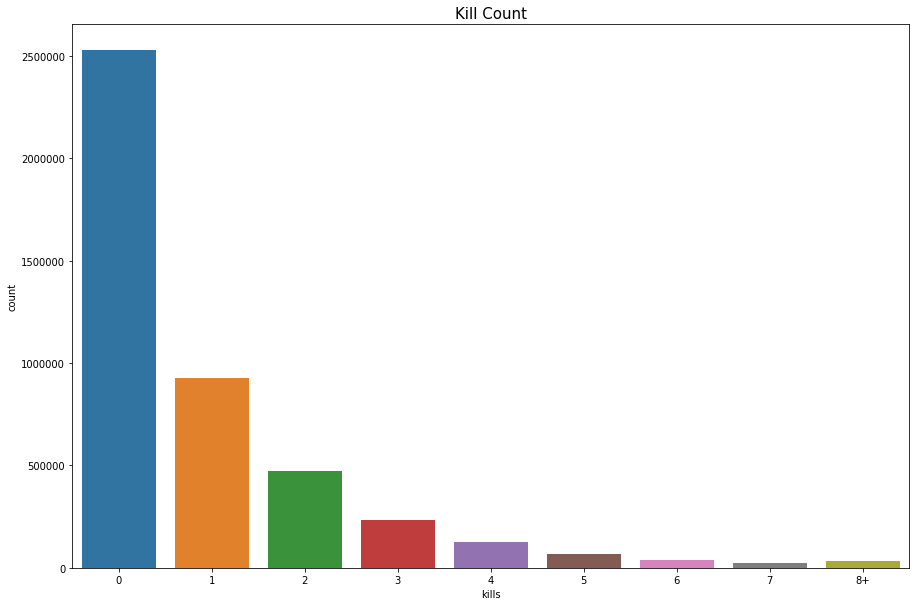

In [8]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

大多数人无法做出一次杀戮。 至少他们会造成伤害吗？

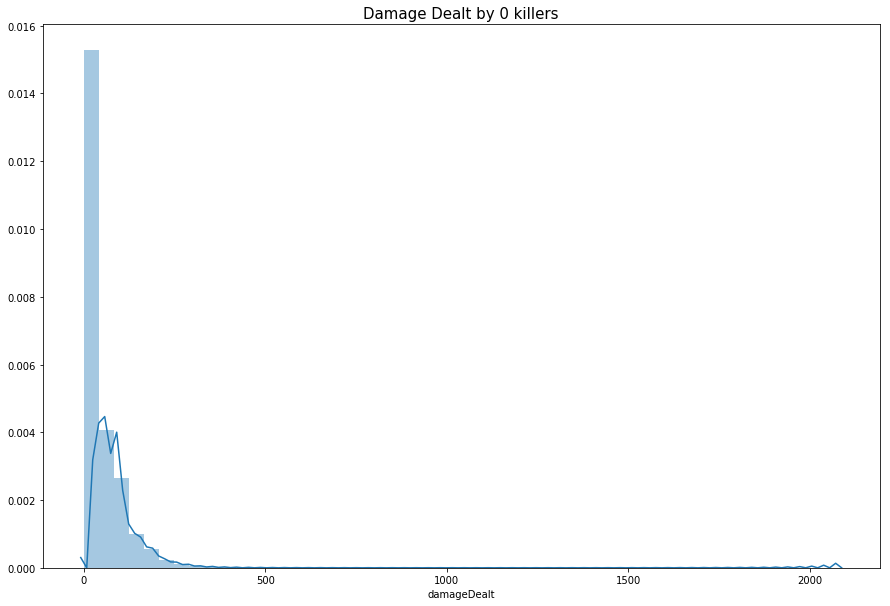

In [9]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

好吧，大多数人没有。 我们来研究一下例外情况。

In [10]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train)))

data1 = train[train['damageDealt'] == 0].copy()
print("{} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train)))

16666 players (0.3748%) have won without a single kill!
4770 players (0.1073%) have won without dealing damage!


绘制胜利位置百分比vs杀人数。

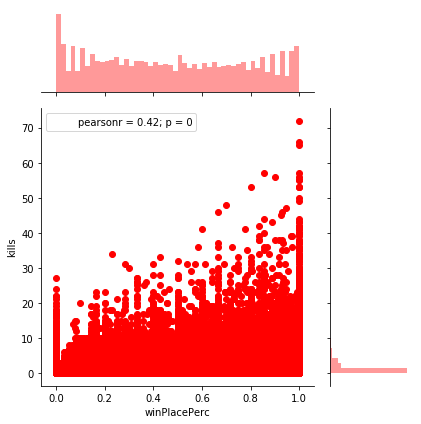

In [14]:
sns.jointplot(x="winPlacePerc", y="kills", data=train, ratio=3, color="r")
plt.show()

显然杀人数与获胜有关，最后让我们根据杀人数（0杀，1-2杀，3-5杀，6-10杀和10+杀）组成玩家。

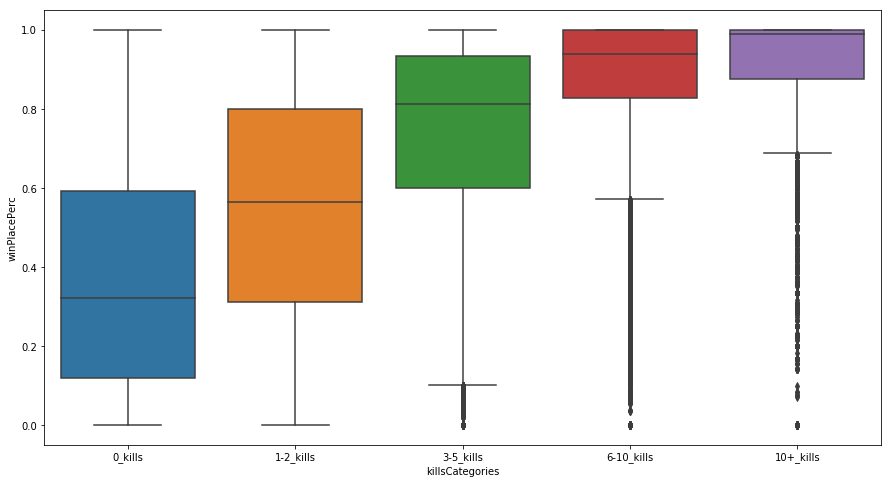

In [15]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

## The Runners

![](img/maxresdefault.jpg)

In [16]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m.".format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))

The average person walks for 1154.2m, 99% of people have walked 4396.0m or less, while the marathoner champion walked for 25780.0m.


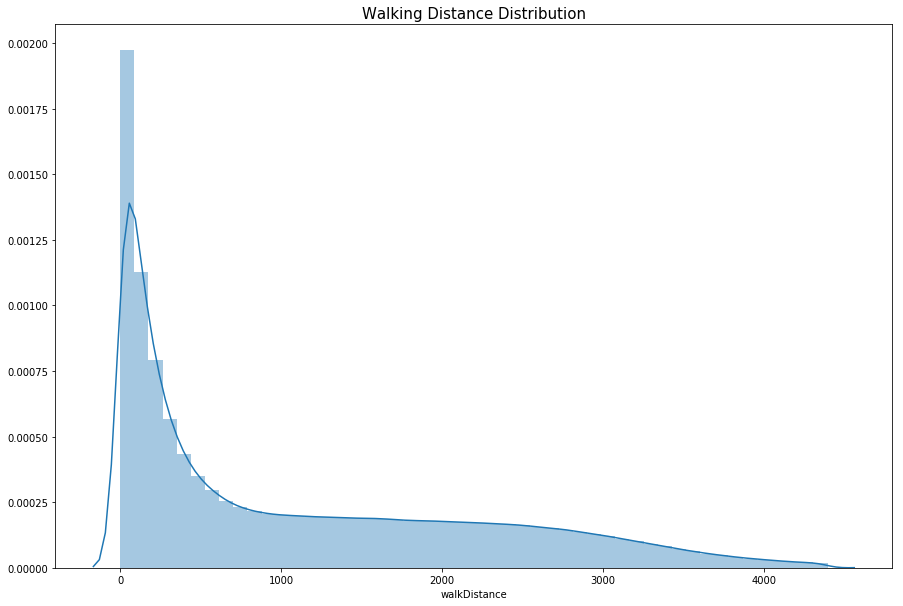

In [17]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [18]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(train)))

99603 players (2.0329%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).


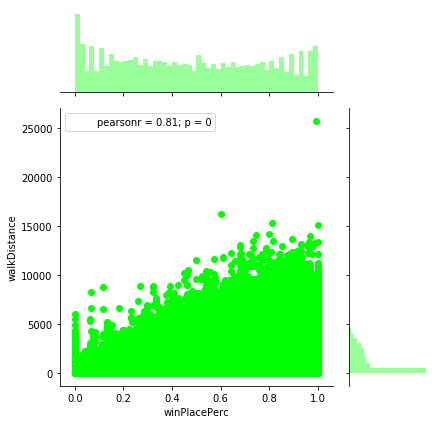

In [20]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, ratio=3, color="lime")
plt.show()

显然，【walkDistance】与【winPlacePerc】有很高的相关性。

## The Drivers

![](img/pubghowtodrivecarsandbikes.jpg)

In [21]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m.".format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

The average person drives for 606.1m, 99% of people have drived 6966.0m or less, while the formula 1 champion drived for 40710.0m.


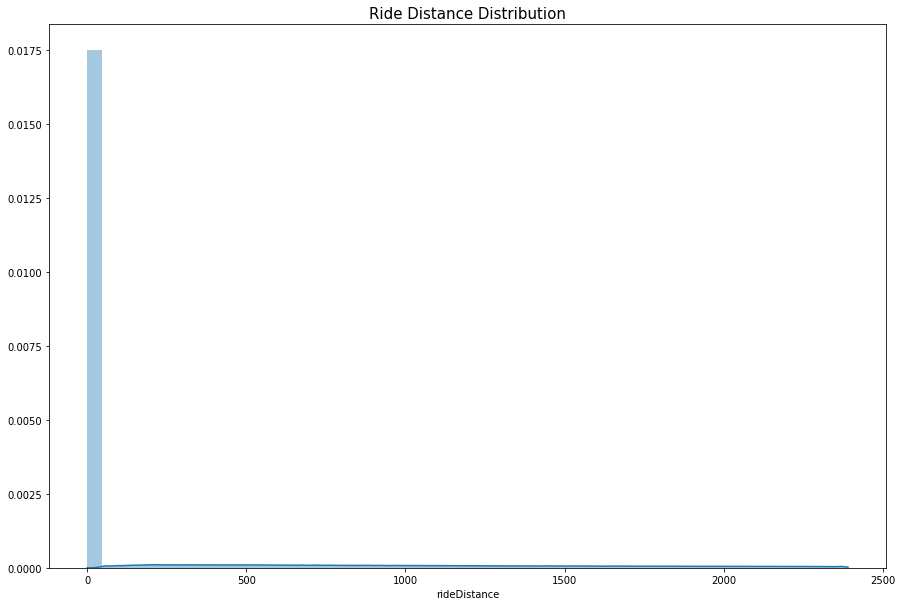

In [22]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [23]:
print("{} players ({:.4f}%) drived for 0 meters. This means that they don't have a driving licence yet.".format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(train)))

3309429 players (23.1022%) drived for 0 meters. This means that they don't have a driving licence yet.


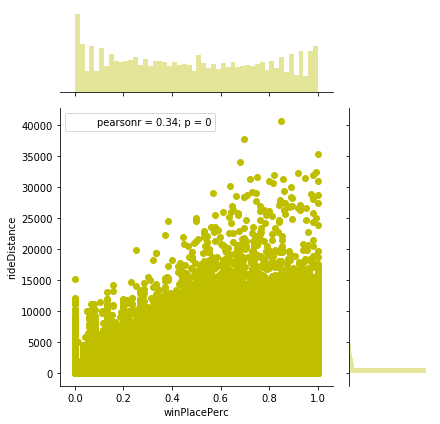

In [25]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, ratio=3, color="y")
plt.show()

【rideDistance】和w【inPlacePerc】之间存在很小的相关性。

根据我的经验摧毁车辆表明玩家有技能，我们来检查吧。

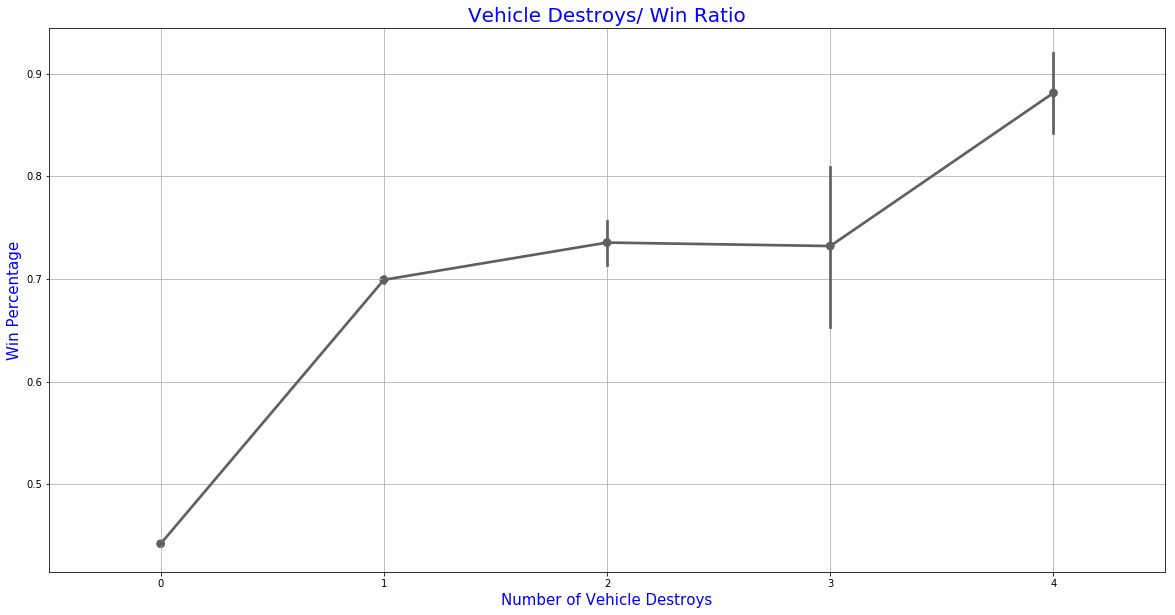

In [26]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

我的经历是对的，摧毁一辆车会提升你获胜的几率！

## The Swimmers

<img src="https://i.ytimg.com/vi/tQxzsE0DijQ/maxresdefault.jpg" alt="The Swimmers" style="width: 700px;"/>

In [27]:
print("The average person swims for {:.1f}m, 99% of people have swimemd {}m or less, while the olympic champion swimmed for {}m.".format(train['swimDistance'].mean(), train['swimDistance'].quantile(0.99), train['swimDistance'].max()))

The average person swims for 4.5m, 99% of people have swimemd 123.0m or less, while the olympic champion swimmed for 3823.0m.


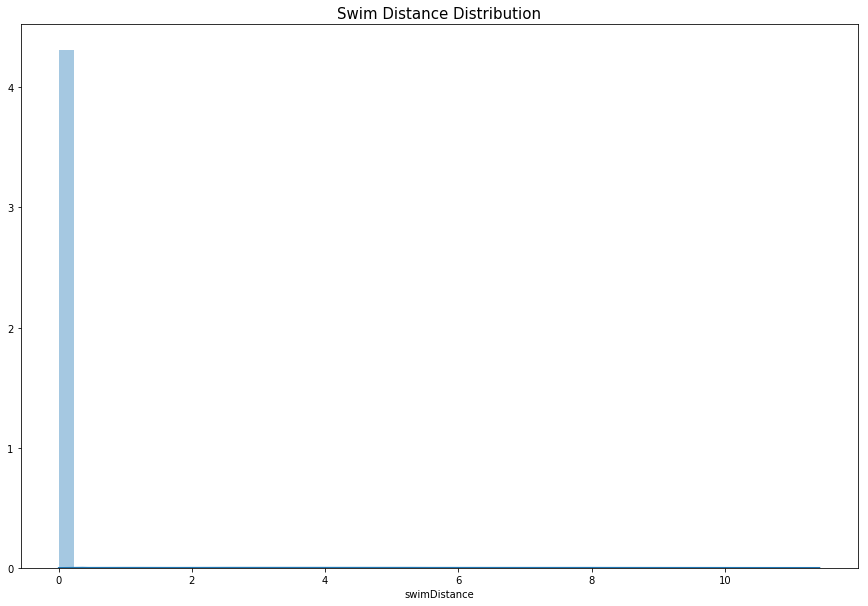

In [28]:
data = train.copy()
data = data[data['swimDistance'] < train['swimDistance'].quantile(0.95)]
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'])
plt.show()

几乎没有人游泳， 让我们将游泳距离分为4类，并绘制不同分类与【winPlacePerc】对比图。

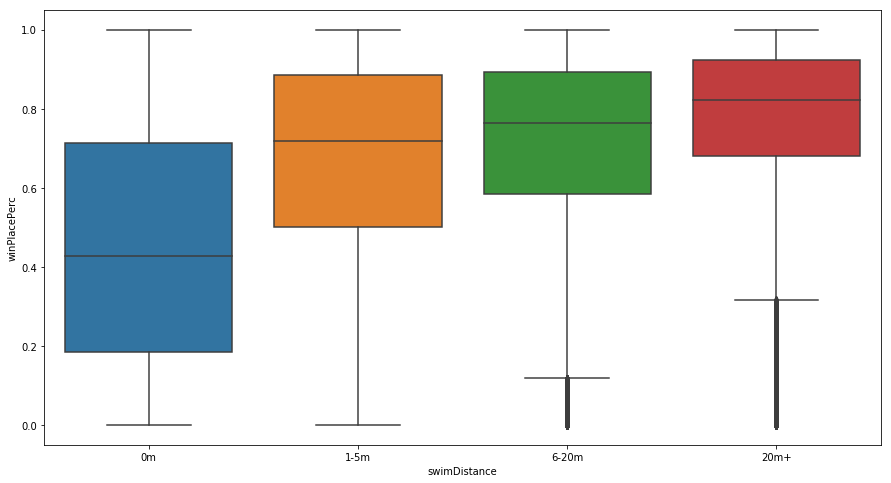

In [29]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

似乎如果你游泳，你就会升到顶峰。 在PUBG中，目前有3张地图，其中一个几乎没有水。 记下来，我可能会计划进行分析以找出匹配在哪个地图中玩耍。

## The Healers

<img src="https://i.ytimg.com/vi/xfI9XljX51k/maxresdefault.jpg" alt="The Healers" style="width: 700px;"/>

In [30]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.


In [ ]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [ ]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color="lime")
plt.show()

In [ ]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color="blue")
plt.show()


所以治疗和技能提升，肯定与【winPlacePerc】相关，相比之下技能提升更多一些。

在每个图中，当值为0时，存在异常行为。

## Solos, Duos and Squads

游戏中有3种游戏模式。 一个人可以独奏，或与朋友（二人组），或与其他3个朋友（小队）一起玩。 100名玩家加入同一台服务器，所以在二人组的情况下，最大的队伍是50，而在小队的情况下，最大的队伍是25。

In [31]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

There are 709111 (15.95%) solo games, 3295326 (74.10%) duo games and 442529 (9.95%) squad games.


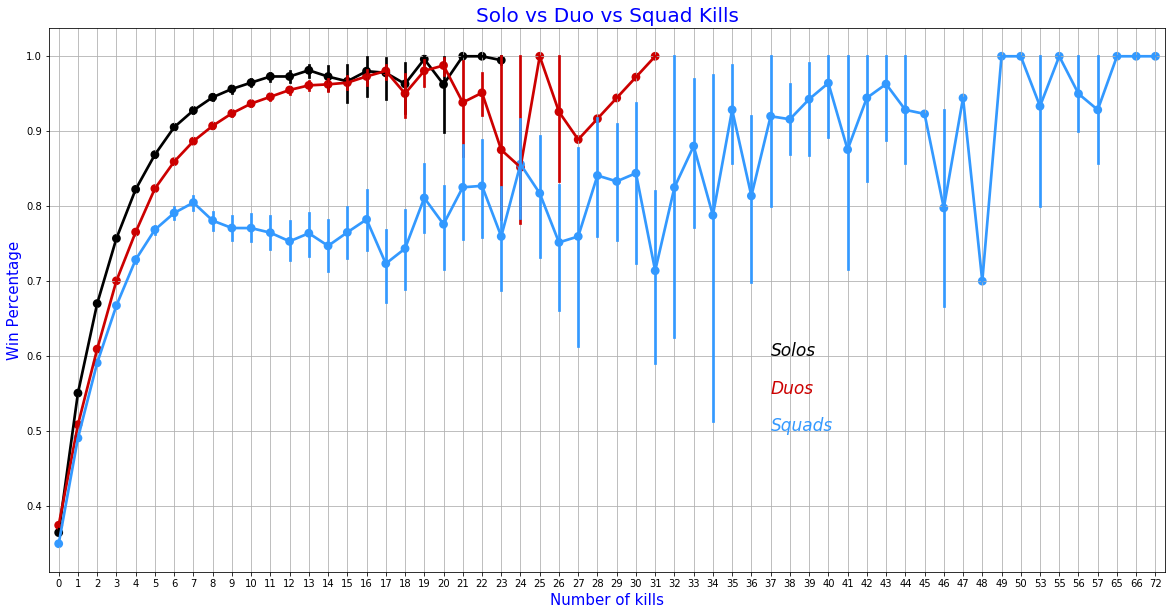

In [32]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

嗯，非常有趣。 Solos和二人组的表现相同，但是如果是Squads队时杀人数并不重要。

属性DBNO意味着敌人玩家被击倒。 “knock”只能在二人组或小队中发生，因为队友有机会在给定时间内“revive”被击倒的球员。 因此，被击倒的玩家可以复活或死亡。 如果他复活，下次他将被击倒，他的队友将没有多少时间让他复活。

属性辅助也可以仅在两人或三人小队中发生，这通常意味着玩家参与了杀戮。

属性复活也发生在两人或三人小队中。

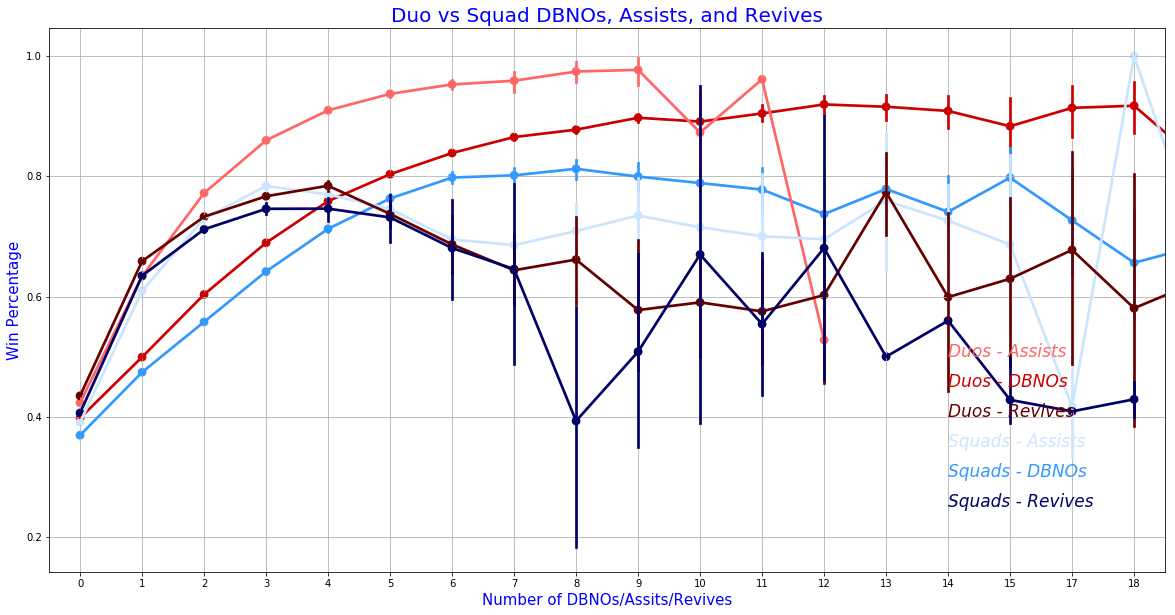

In [33]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='#FF6666',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='#CCE5FF',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='#660000',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='#000066',alpha=0.8)
plt.text(14,0.5,'Duos - Assists',color='#FF6666',fontsize = 17,style = 'italic')
plt.text(14,0.45,'Duos - DBNOs',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(14,0.4,'Duos - Revives',color='#660000',fontsize = 17,style = 'italic')
plt.text(14,0.35,'Squads - Assists',color='#CCE5FF',fontsize = 17,style = 'italic')
plt.text(14,0.3,'Squads - DBNOs',color='#3399FF',fontsize = 17,style = 'italic')
plt.text(14,0.25,'Squads - Revives',color='#000066',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()
plt.show()

## Pearson变量之间的相关性

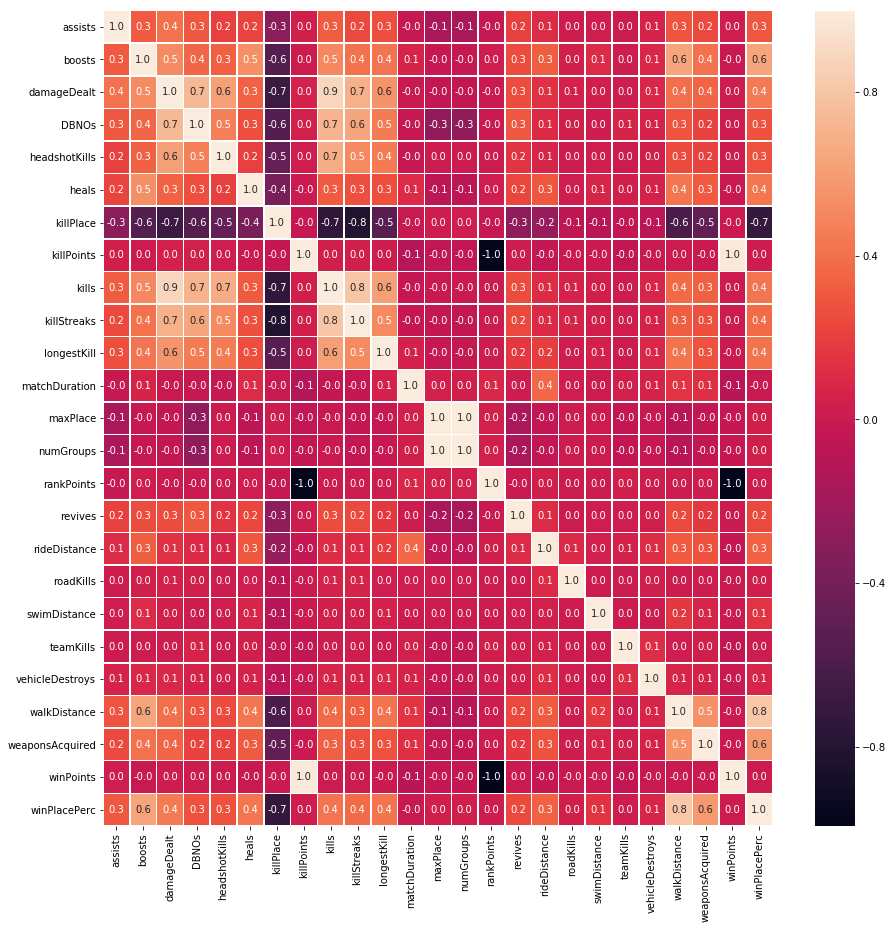

In [34]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

就目标变量（winPlacePerc）而言，存在一些高中高相关变量。 最高正相关是walkDistance，最高负相关killPlace。

**让我们使用目标缩放到前5个最正相关的变量。**

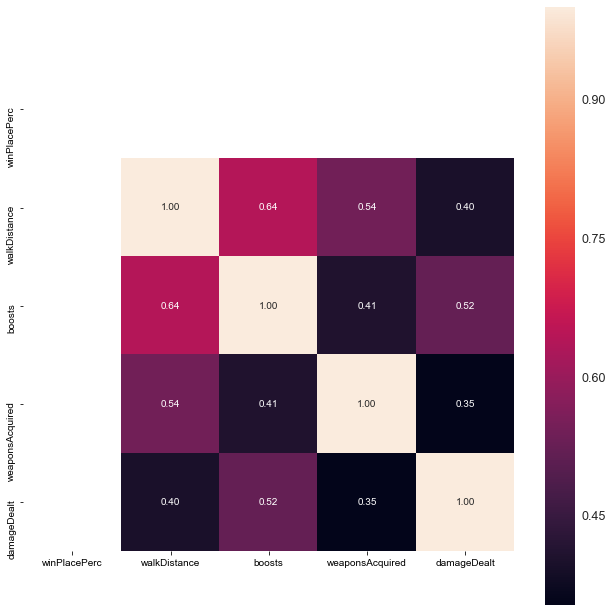

In [35]:
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Let's plot the above variables and the killPlace variable as pairs.

ValueError: max must be larger than min in range parameter.

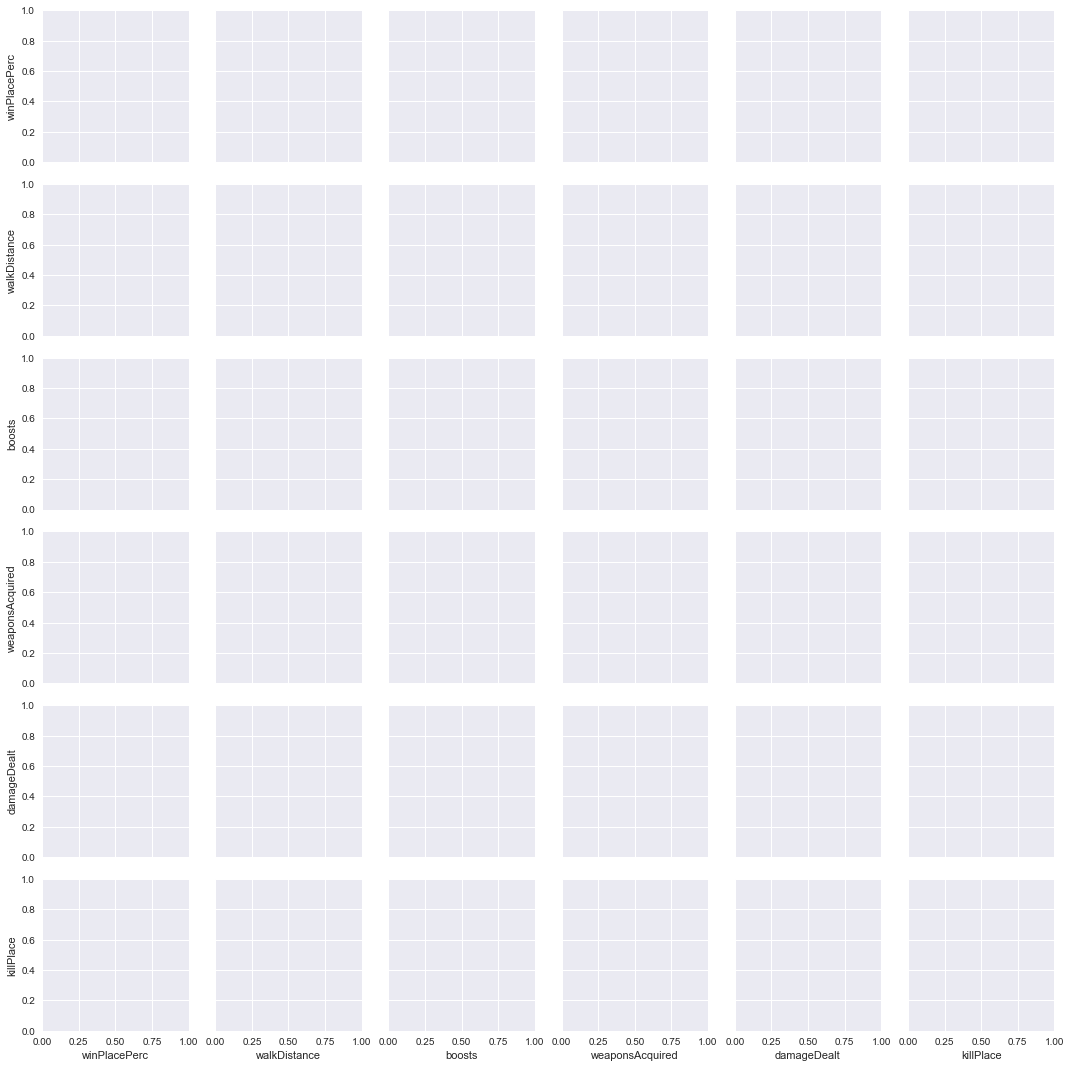

In [37]:
sns.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']
sns.pairplot(train[cols], size = 2.5)
plt.show()

## Feature Engineering

PUBG中的游戏最多可以有100名玩家互相争斗, 但大多数时候游戏都不是“满员”。 没有变量可以为我们提供加入的玩家数量,所以让我们创建一个。

In [38]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')

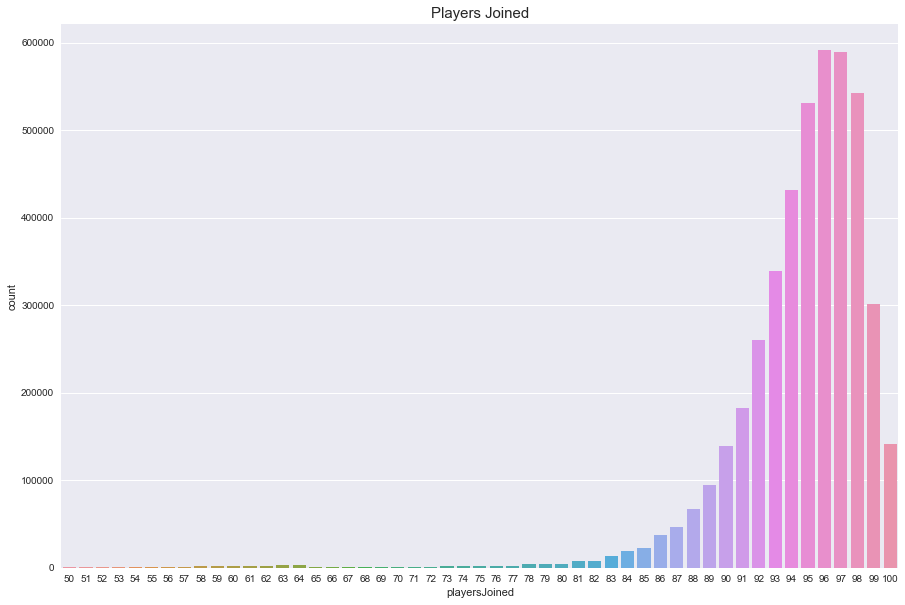

In [39]:
data = train.copy()
data = data[data['playersJoined']>49]
plt.figure(figsize=(15,10))
sns.countplot(data['playersJoined'])
plt.title("Players Joined",fontsize=15)
plt.show()

基于“playersJoined”特征，我们可以创建（或更改）许多其他功能来规范化其值。 例如，我将创建“killsNorm”和“damageDealtNorm”特征。 当游戏中有100名玩家时，可能比找到90名玩家更容易找到并杀死某人。 因此，我将以100个玩家的击杀得分1（实际上是这样）的方式将杀伤归一化，并且在90个玩家中它将得分(100-90)/100 + 1 = 1.1。 这只是一个假设，您可以使用不同的比例。

In [40]:
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train[['playersJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][5:8]

,playersJoined,kills,killsNorm,damageDealt,damageDealtNorm
5,95,1,1.05,100.000,105.00000
6,97,0,0.00,0.000,0.00000
7,96,0,0.00,8.538,8.87952


Another simple feature is the sum of heals and boosts. Also the sum of total distance travelled.

In [41]:
train['healsAndBoosts'] = train['heals']+train['boosts']
train['totalDistance'] = train['walkDistance']+train['rideDistance']+train['swimDistance']

When using boosting items you run faster. They also help staying out of the zone (PUBG term) and loot more (meaning walking more). So lets create a feature boosts per walking distance. Heals don't make you run faster, but they also help staying out of the zone and loot more. So lets create the same feature for heals also.

In [42]:
train['boostsPerWalkDistance'] = train['boosts']/(train['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where boosts>0 and walkDistance=0. Strange.
train['boostsPerWalkDistance'].fillna(0, inplace=True)
train['healsPerWalkDistance'] = train['heals']/(train['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where heals>0 and walkDistance=0. Strange.
train['healsPerWalkDistance'].fillna(0, inplace=True)
train['healsAndBoostsPerWalkDistance'] = train['healsAndBoosts']/(train['walkDistance']+1) #The +1 is to avoid infinity.
train['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)
train[['walkDistance', 'boosts', 'boostsPerWalkDistance' ,'heals',  'healsPerWalkDistance', 'healsAndBoosts', 'healsAndBoostsPerWalkDistance']][40:45]

,walkDistance,boosts,boostsPerWalkDistance,heals,healsPerWalkDistance,healsAndBoosts,healsAndBoostsPerWalkDistance
40,327.30,1,0.003046,1,0.003046,2,0.006092
41,128.80,0,0.000000,0,0.000000,0,0.000000
42,52.52,0,0.000000,0,0.000000,0,0.000000
43,534.10,1,0.001869,0,0.000000,1,0.001869
44,2576.00,4,0.001552,6,0.002328,10,0.003880


Same, let's create the feature "killsPerWalkDistance".

In [43]:
train['killsPerWalkDistance'] = train['kills']/(train['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where kills>0 and walkDistance=0. Strange.
train['killsPerWalkDistance'].fillna(0, inplace=True)
train[['kills', 'walkDistance', 'rideDistance', 'killsPerWalkDistance', 'winPlacePerc']].sort_values(by='killsPerWalkDistance').tail(10)

,kills,walkDistance,rideDistance,killsPerWalkDistance,winPlacePerc
4115816,29,0.0,0.0,29.0,0.7500
3083358,30,0.0,0.0,30.0,0.7500
422093,30,0.0,0.0,30.0,1.0000
2394021,31,0.0,0.0,31.0,0.5385
3057746,31,0.0,0.0,31.0,0.7500
2998470,35,0.0,0.0,35.0,1.0000
1158891,36,0.0,0.0,36.0,0.5833
3062788,36,0.0,0.0,36.0,0.8667
1068513,38,0.0,0.0,38.0,0.8333
1702541,43,0.0,0.0,43.0,1.0000


0 walking distance and many kills? Also most have winPlacePerc=1. Definitelly cheaters.

Earlier in the kernel we did EDA for Solos, Duos and Squads. Lets create a column for them.

In [44]:
train['team'] = [1 if i>50 else 2 if (i>25 & i<=50) else 4 for i in train['numGroups']]

In [45]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,playersJoined,killsNorm,damageDealtNorm,healsAndBoosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,killsPerWalkDistance,team
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,96,0.00,0.0000,0,244.8000,0.0,0.0,0.0,0.000000,2
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,91,0.00,99.7023,0,1445.0445,0.0,0.0,0.0,0.000000,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,98,0.00,69.3600,0,161.8000,0.0,0.0,0.0,0.000000,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,91,0.00,35.8610,0,202.7000,0.0,0.0,0.0,0.000000,2
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,97,1.03,103.0000,0,49.7500,0.0,0.0,0.0,0.019704,1


So we created 10 features. I hope some of them to be useful.

### Thank you if you reached this point! This is my first kernel ever. An upvote would be really appreciated and help me keep going!

### In progress.. 